# BCG Exploratory Data Analysis & Data Cleaning

## Importing all the required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)

%matplotlib inline

## Data cleaning and inspection

In [2]:
training_data = pd.read_csv('ml_case_training_data.csv')
history_data = pd.read_csv('ml_case_training_hist_data.csv')
output_data = pd.read_csv('ml_case_training_output.csv')

In [3]:
training_data.shape, history_data.shape, output_data.shape

((16096, 32), (193002, 8), (16096, 2))

In [4]:
training_data.isnull().sum()*100/training_data.shape[0]

id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele     

In [5]:
history_data.isnull().sum()*100/history_data.shape[0]

id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64

In [6]:
output_data.isnull().sum()*100/output_data.shape[0]

id       0.0
churn    0.0
dtype: float64

#####   Drop the columns that have more than 50% of their values missing.

In [7]:
n_rows_training = training_data.shape[0]

print(training_data.isnull().sum()*100/n_rows_training)

n_rows_history = history_data.shape[0]

print(history_data.isnull().sum()*100/n_rows_history)

id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele     

In [8]:
training_data.drop(['activity_new', 'campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele',
                    'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'origin_up'], axis=1, inplace=True)

training_data.isnull().sum()

id                             0
channel_sales               4218
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       2
date_modif_prod              157
date_renewal                  40
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy     126
forecast_meter_rent_12m        0
forecast_price_energy_p1     126
forecast_price_energy_p2     126
forecast_price_pow_p1        126
has_gas                        0
imp_cons                       0
margin_gross_pow_ele          13
margin_net_pow_ele            13
nb_prod_act                    0
net_margin                    15
num_years_antig                0
pow_max                        3
dtype: int64

## Now for the coloumns with less missing values, imputing with mean values in them

In [9]:
# Impute missing values for non numerical features with the mode 
for col in ['channel_sales', 'date_end', 'date_modif_prod', 'date_renewal']:
    training_data[col] = training_data[col].fillna(training_data[col].mode().iloc[0])

# Impute missing values for non numerical features with the mean 
training_data.fillna(training_data.mean(), inplace=True)
history_data.fillna(history_data.mean(), inplace=True)

# Check if there are other remaining missing values
print(training_data.isnull().sum().sum() == 0)
print(history_data.isnull().sum().sum() == 0)

True
True


## Duplicates

In [10]:
training_data.duplicated().sum()
history_data.duplicated().sum()

0

## Data types conversions

In [11]:
training_data.dtypes

id                           object
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_modif_prod              object
date_renewal                 object
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int64
net_margin                  float64
num_years_antig               int64
pow_max                     float64
dtype: object

In [12]:
history_data.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

### converting into correct data types

In [13]:
import datetime

training_data['id'] = training_data['id'].astype('string')
training_data['channel_sales'] = training_data['channel_sales'].astype('string')

training_data['date_activ'] = training_data['date_activ'].astype({'date_activ': 'datetime64[ns]'})
training_data['date_end'] = training_data['date_end'].astype({'date_end': 'datetime64[ns]'})
training_data['date_modif_prod'] = training_data['date_modif_prod'].astype({'date_modif_prod': 'datetime64[ns]'})
training_data['date_renewal'] = training_data['date_renewal'].astype({'date_renewal': 'datetime64[ns]'})

training_data['has_gas'] = training_data['has_gas'].astype(bool)

training_data.dtypes

id                                  string
channel_sales                       string
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                               bool
imp_cons                           float64
margin_gross_pow_ele               float64
margin_net_pow_ele                 float64
nb_prod_act                          int64
net_margin                         float64
num_years_antig                      int64
pow_max    

# Exploratory Data Analysis 

In [14]:
training_data.head()

id                     channel_sales  \
0  48ada52261e7cf58715202705a0451c9  lmkebamcaaclubfxadlmueccxoimlema   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  d29c2c54acc38ff3c0614d0a653813dd  foosdfpfkusacimwkcsosbicdxkicaua   
3  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
4  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0    309275             0            10025 2012-07-11 2016-06-11   
1         0         54946                0 2013-06-15 2016-06-15   
2      4660             0                0 2009-08-21 2016-08-30   
3       544             0                0 2010-04-16 2016-04-16   
4      1584             0                0 2010-03-30 2016-03-30   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2012-07-11   2015-09-11           26520.30  ...   
1      2015-01-11   2015-06-23               0.00  ...   
2      2009-08-21   2015-08-31             189.95  ...   
3      2010-04-16   2015-04-17              47.96  ...   
4      2010-03-30   2015-03-31             240.04  ...   

   forecast_price_energy_p2  forecast_price_pow_p1  has_gas  imp_cons  \
0                  0.088347              58.995952     True     831.8   
1                  0.098142              40.606701     True       0.0   
2                  0.000000              44.311378     True       0.0   
3                  0.087899              44.311378     True       0.0   
4                  0.000000              44.311378     True       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                -41.76              -41.76            1     1732.36   
1                 25.44               25.44            2      678.99   
2                 16.38               16.38            1       18.89   
3                 28.60               28.60            1        6.60   
4                 30.22               30.22            1       25.46   

   num_years_antig  pow_max  
0                3  180.000  
1                3   43.648  
2                6   13.800  
3                6   13.856  
4                6   13.200  

[5 rows x 24 columns]

In [15]:
history_data.head()

id  price_date  price_p1_var  price_p2_var  \
0  038af19179925da21a25619c5a24b745  01/01/2015      0.151367           0.0   
1  038af19179925da21a25619c5a24b745  01/02/2015      0.151367           0.0   
2  038af19179925da21a25619c5a24b745  01/03/2015      0.151367           0.0   
3  038af19179925da21a25619c5a24b745  01/04/2015      0.149626           0.0   
4  038af19179925da21a25619c5a24b745  01/05/2015      0.149626           0.0   

   price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix  
0           0.0     44.266931           0.0           0.0  
1           0.0     44.266931           0.0           0.0  
2           0.0     44.266931           0.0           0.0  
3           0.0     44.266931           0.0           0.0  
4           0.0     44.266931           0.0           0.0

### statistical summary of both training and history data

In [16]:
training_data.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.609600e+04  1.609600e+04     1.609600e+04       16096.000000   
mean   1.948044e+05  3.191164e+04     1.946154e+04        2370.555949   
std    6.795151e+05  1.775885e+05     8.235676e+04        4035.085664   
min   -1.252760e+05 -3.037000e+03    -9.138600e+04      -16689.260000   
25%    5.906250e+03  0.000000e+00     0.000000e+00         513.230000   
50%    1.533250e+04  0.000000e+00     9.010000e+02        1179.160000   
75%    5.022150e+04  0.000000e+00     4.127000e+03        2692.077500   
max    1.609711e+07  4.188440e+06     4.538720e+06      103801.930000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        16096.000000              16096.000000             16096.000000   
mean          1907.347229                  0.991547                70.309945   
std           5257.364759                  5.140728                79.023251   
min         -85627.000000                  0.000000              -242.960000   
25%              0.000000                  0.000000                16.230000   
50%            378.000000                  0.000000                19.440000   
75%           1994.250000                  0.000000               131.470000   
max         175375.000000                 50.000000              2411.690000   

       forecast_price_energy_p1  forecast_price_energy_p2  \
count              16096.000000              16096.000000   
mean                   0.135901                  0.052951   
std                    0.026149                  0.048427   
min                    0.000000                  0.000000   
25%                    0.115237                  0.000000   
50%                    0.142881                  0.085917   
75%                    0.146348                  0.098837   
max                    0.273963                  0.195975   

       forecast_price_pow_p1      imp_cons  margin_gross_pow_ele  \
count           16096.000000  16096.000000          16096.000000   
mean               43.533496    196.123447             22.462276   
std                 5.191810    494.366979             23.691309   
min                -0.122184  -9038.210000           -525.540000   
25%                40.606701      0.000000             12.025000   
50%                44.311378     44.465000             21.090000   
75%                44.311378    218.090000             29.640000   
max                59.444710  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        16096.000000  16096.000000  16096.000000     16096.000000   
mean            21.460318      1.347788    217.987028         5.030629   
std             27.906072      1.459808    366.571095         1.676101   
min           -615.660000      1.000000  -4148.990000         1.000000   
25%             11.950000      1.000000     52.017500         4.000000   
50%             21.000000      1.000000    119.900000         5.000000   
75%             29.640000      1.000000    275.735000         6.000000   
max            374.640000     32.000000  24570.650000        16.000000   

            pow_max  
count  16096.000000  
mean      20.604131  
std       21.770392  
min        1.000000  
25%       12.500000  
50%       13.856000  
75%       19.800000  
max      500.000000

In [17]:
history_data.describe()

price_p1_var   price_p2_var   price_p3_var   price_p1_fix  \
count  193002.000000  193002.000000  193002.000000  193002.000000   
mean        0.140991       0.054412       0.030712      43.325546   
std         0.025029       0.049857       0.036207       5.418773   
min         0.000000       0.000000       0.000000      -0.177779   
25%         0.125976       0.000000       0.000000      40.728885   
50%         0.145859       0.085100       0.000000      44.266930   
75%         0.151635       0.101673       0.072558      44.444710   
max         0.280700       0.229788       0.114102      59.444710   

        price_p2_fix   price_p3_fix  
count  193002.000000  193002.000000  
mean       10.698201       6.455436  
std        12.810704       7.754831  
min        -0.097752      -0.065172  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%        24.339581      16.226389  
max        36.490692      17.458221

### Merging training dataframe with output dataframe

In [18]:
train = pd.merge(training_data, output_data, on='id')
train['id'] = train['id'].astype('string')
train.head()

id                     channel_sales  \
0  48ada52261e7cf58715202705a0451c9  lmkebamcaaclubfxadlmueccxoimlema   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  d29c2c54acc38ff3c0614d0a653813dd  foosdfpfkusacimwkcsosbicdxkicaua   
3  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
4  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0    309275             0            10025 2012-07-11 2016-06-11   
1         0         54946                0 2013-06-15 2016-06-15   
2      4660             0                0 2009-08-21 2016-08-30   
3       544             0                0 2010-04-16 2016-04-16   
4      1584             0                0 2010-03-30 2016-03-30   

  date_modif_prod date_renewal  forecast_cons_12m  ...  forecast_price_pow_p1  \
0      2012-07-11   2015-09-11           26520.30  ...              58.995952   
1      2015-01-11   2015-06-23               0.00  ...              40.606701   
2      2009-08-21   2015-08-31             189.95  ...              44.311378   
3      2010-04-16   2015-04-17              47.96  ...              44.311378   
4      2010-03-30   2015-03-31             240.04  ...              44.311378   

   has_gas  imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
0     True     831.8                -41.76              -41.76            1   
1     True       0.0                 25.44               25.44            2   
2     True       0.0                 16.38               16.38            1   
3     True       0.0                 28.60               28.60            1   
4     True       0.0                 30.22               30.22            1   

   net_margin  num_years_antig  pow_max  churn  
0     1732.36                3  180.000      0  
1      678.99                3   43.648      1  
2       18.89                6   13.800      0  
3        6.60                6   13.856      0  
4       25.46                6   13.200      0  

[5 rows x 25 columns]

### Now, performing visualization 

In [19]:
!pip install xlrd
!pip install autoviz

In [20]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

## Graphical univariate analysis, bivariate analysis and correlation analysis

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (16096, 32)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  15
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  1
    Number of Date Time Columns =  

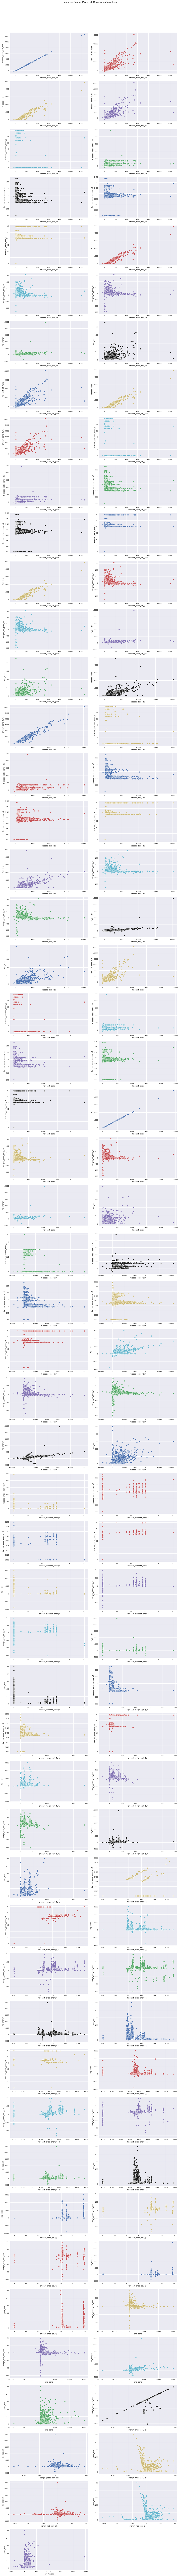

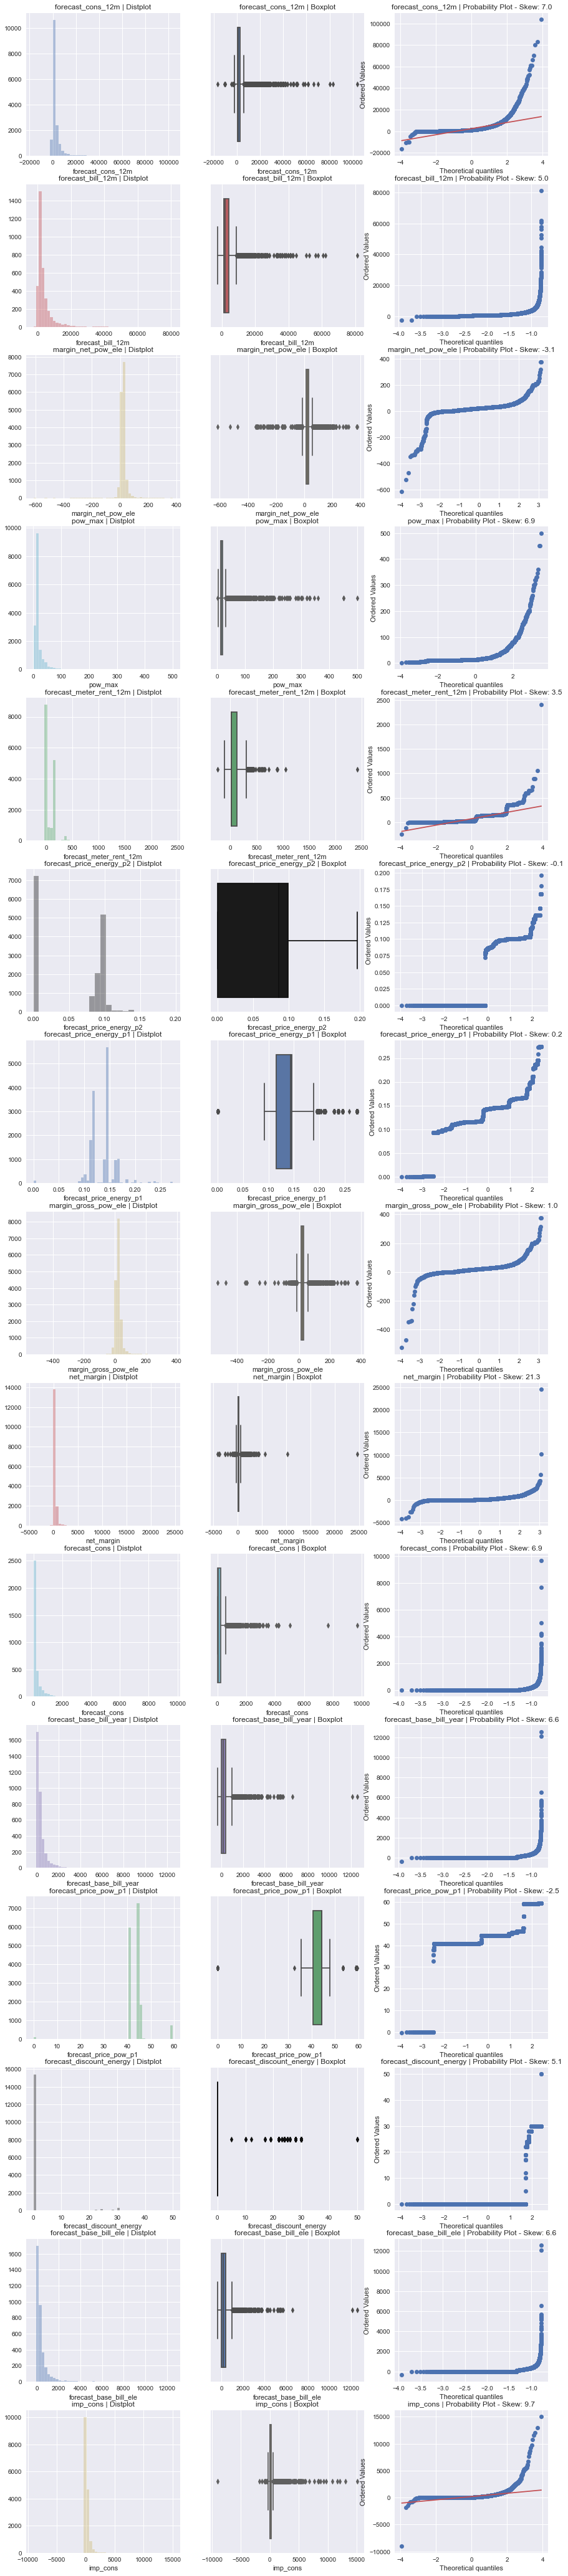

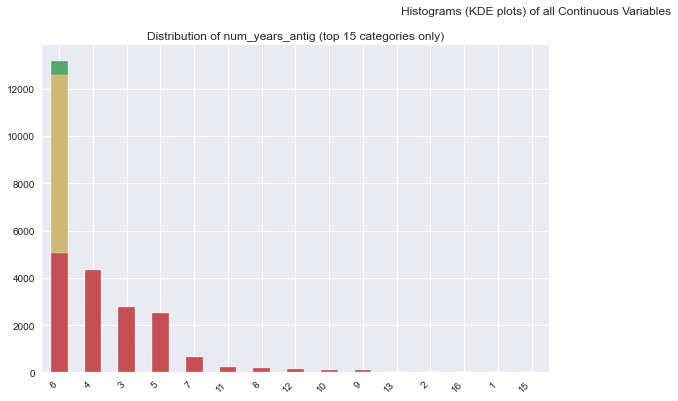

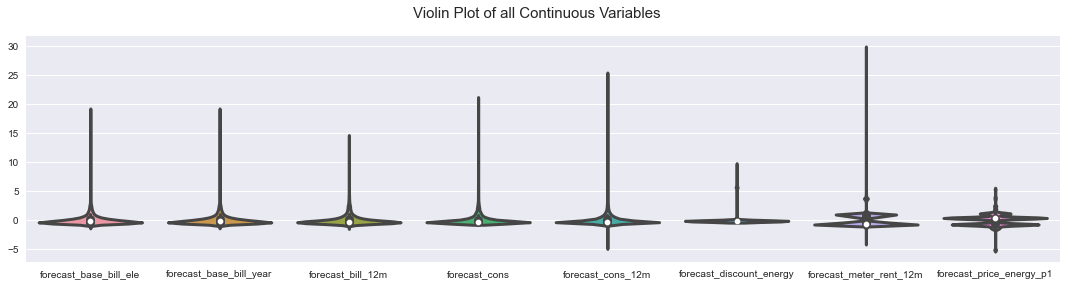

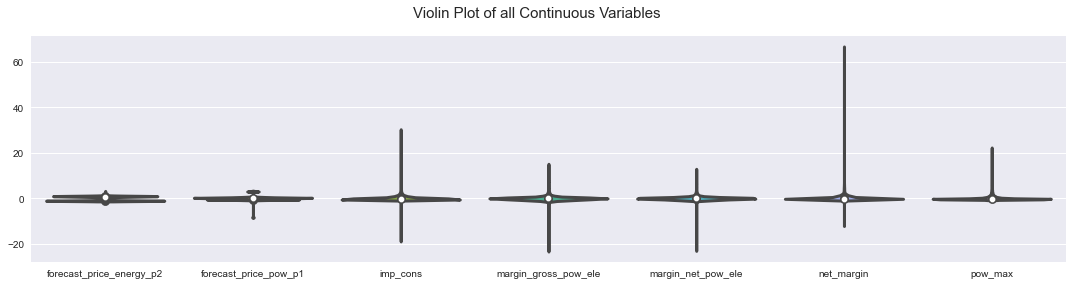

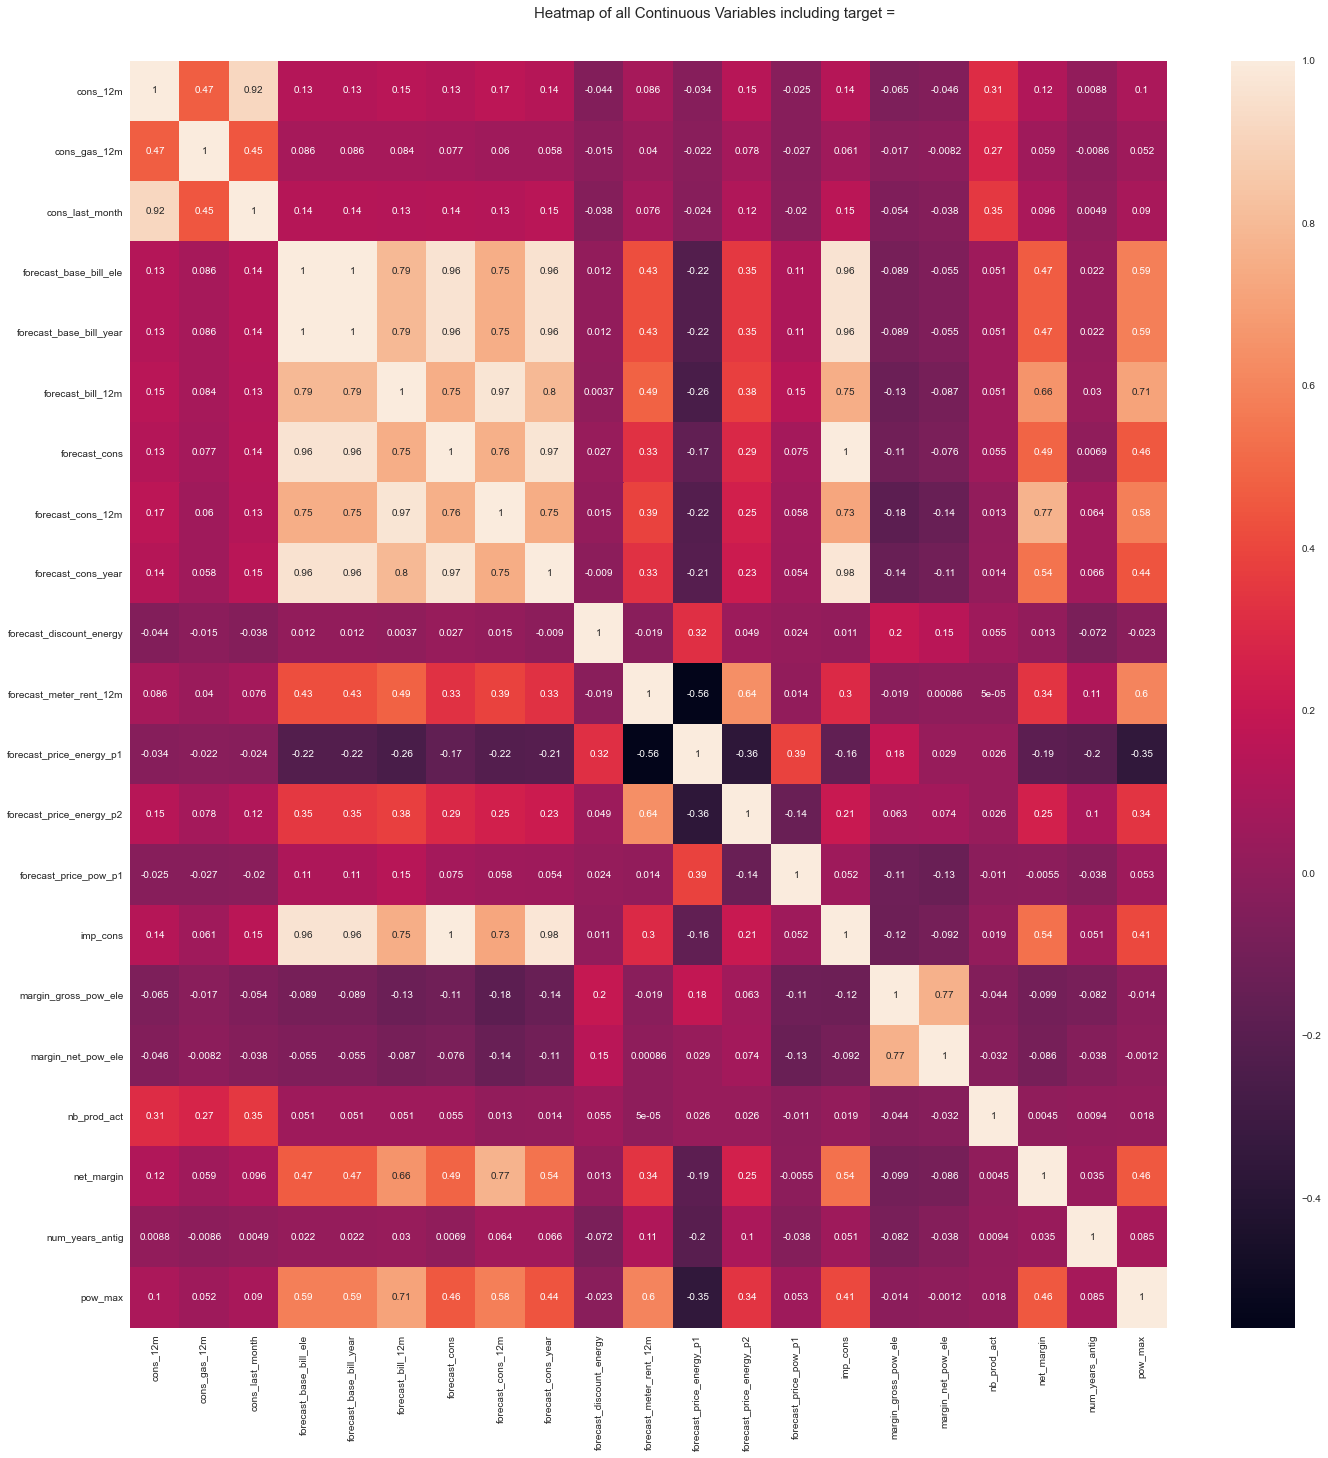

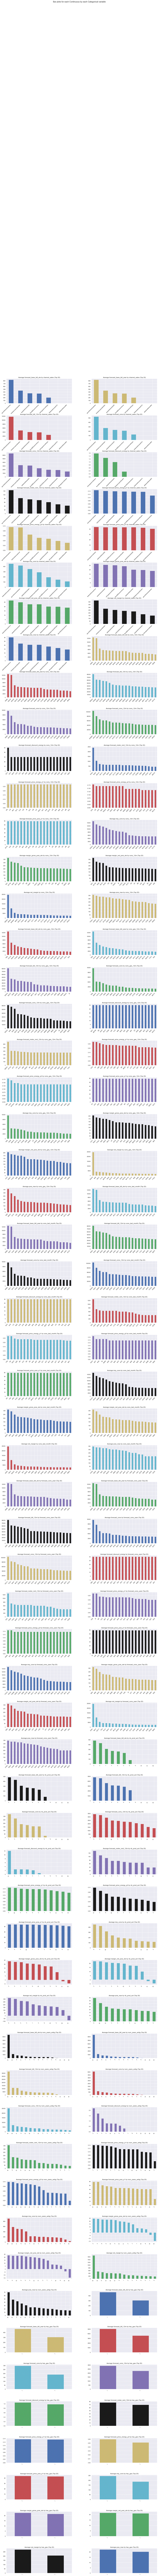

Time to run AutoViz (in seconds) = 81.260

 ###################### VISUALIZATION Completed ########################


In [21]:
from autoviz.AutoViz_Class import AutoViz_Class
plt.figure(figsize=(15,8))
AV = AutoViz_Class()
df = AV.AutoViz('ml_case_training_data.csv')

## Removing outliers

In [22]:
from scipy import stats
float_columns = [col for col in train.columns if train[col].dtype == 'float64']
train = train[(np.abs(stats.zscore(train[float_columns])) < 3).all(axis=1)]

train.shape

(14459, 25)

# Feature Engineering

### Finding the duration of the contract

In [23]:
train['duration'] = (train['date_end'] - train['date_activ']).dt.days
print(train['duration'])

1        1096
2        2566
3        2192
4        2192
5        2192
         ... 
16091    1534
16092    1461
16093    1430
16094    1461
16095    2556
Name: duration, Length: 14459, dtype: int64


In [24]:
# Drop dates columns
train.drop(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], axis=1, inplace=True)

In [25]:
# Target encoding for the channel_sales column
train['channel_sales_encoded'] = train.groupby('channel_sales')['churn'].transform("mean")
train.drop('channel_sales', inplace=True, axis=1)

## PCA for Dimensionality Reduction

In [26]:
features = ['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'duration',
       'channel_sales_encoded']

In [27]:
X = train.copy()
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [28]:
X_scaled.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.445900e+04  1.445900e+04     1.445900e+04       1.445900e+04   
mean  -4.270738e-17  2.101580e-15     6.160705e-16       4.188349e-16   
std    1.000000e+00  1.000000e+00     1.000000e+00       1.000000e+00   
min   -3.131081e-01 -1.959323e-01    -1.473451e+00      -2.546177e+00   
25%   -2.775718e-01 -1.790915e-01    -2.540764e-01      -6.525765e-01   
50%   -2.643175e-01 -1.790915e-01    -2.429215e-01      -3.560985e-01   
75%   -2.198439e-01 -1.790915e-01    -2.050804e-01       2.626047e-01   
max    9.105611e+00  2.304667e+01     1.003618e+01       5.847763e+00   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        1.445900e+04              1.445900e+04             1.445900e+04   
mean         2.725993e-16             -9.272165e-16            -2.118031e-15   
std          1.000000e+00              1.000000e+00             1.000000e+00   
min         -4.807097e+00             -5.906545e-02            -3.029014e+00   
25%         -5.917146e-01             -5.906545e-02            -7.851919e-01   
50%         -4.431681e-01             -5.906545e-02            -7.336865e-01   
75%          1.856931e-01             -5.906545e-02             1.183307e+00   
max          8.093334e+00              7.417555e+01             4.085235e+00   

       forecast_price_energy_p1  forecast_price_energy_p2  \
count              1.445900e+04              1.445900e+04   
mean               2.205619e-13             -3.720956e-14   
std                1.000000e+00              1.000000e+00   
min               -2.179678e+00             -1.068393e+00   
25%               -1.059685e+00             -1.068393e+00   
50%                4.059061e-01              6.927449e-01   
75%                5.630109e-01              1.000295e+00   
max                3.940873e+00              1.785160e+00   

       forecast_price_pow_p1      imp_cons  margin_gross_pow_ele  \
count           1.445900e+04  1.445900e+04          1.445900e+04   
mean           -2.424885e-12  8.886391e-16         -1.960471e-14   
std             1.000000e+00  1.000000e+00          1.000000e+00   
min            -2.492987e+00 -4.759125e+00         -4.945266e+00   
25%            -9.086694e-01 -6.164804e-01         -6.190770e-01   
50%             2.533702e-01 -4.452676e-01         -3.577058e-02   
75%             2.533702e-01  2.171756e-01          5.210219e-01   
max             4.876811e+00  6.384251e+00          5.314887e+00   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        1.445900e+04  1.445900e+04  1.445900e+04     1.445900e+04   
mean        -2.007219e-14  8.103000e-16  1.339101e-15     2.196182e-16   
std          1.000000e+00  1.000000e+00  1.000000e+00     1.000000e+00   
min         -5.596973e+00 -2.316118e-01 -4.813936e+00    -2.481499e+00   
25%         -6.179122e-01 -2.316118e-01 -6.891071e-01    -6.298514e-01   
50%         -3.464658e-02 -2.316118e-01 -3.652855e-01    -1.263545e-02   
75%          5.207046e-01 -2.316118e-01  3.273439e-01     6.045805e-01   
max          5.302161e+00  2.100716e+01  5.633624e+00     6.159524e+00   

            pow_max         churn      duration  channel_sales_encoded  
count  1.445900e+04  1.445900e+04  1.445900e+04           1.445900e+04  
mean  -2.678030e-14 -6.406568e-16 -1.240372e-16           2.228831e-14  
std    1.000000e+00  1.000000e+00  1.000000e+00           1.000000e+00  
min   -1.674850e+00 -3.281878e-01 -2.703160e+00          -5.358157e+00  
25%   -5.012119e-01 -3.281878e-01 -9.055150e-01           3.226857e-02  
50%   -3.628247e-01 -3.281878e-01 -2.363188e-01           5.038846e-01  
75%    2.080736e-01 -3.281878e-01  6.264194e-01           5.038846e-01  
max    6.975371e+00  3.046825e+00  5.973428e+00           5.038846e-01

In [34]:
import plotly.express as px
from sklearn.decomposition import PCA

# Apply PCA on the dataset
pca = PCA(n_components=12)
components = pca.fit_transform(X_scaled)

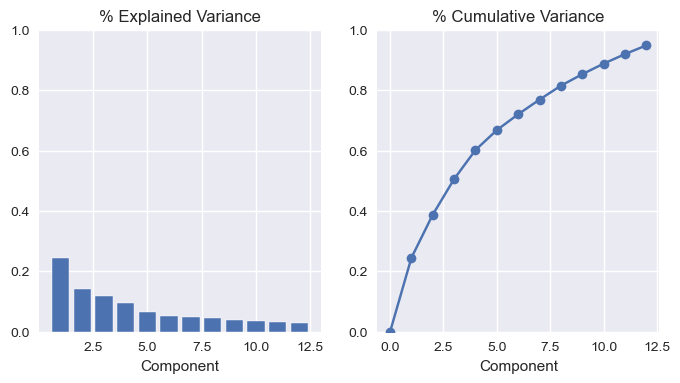

In [35]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

# Plot PCA illustration
plot_variance(pca);

# Machine learning models

### Merge the history and train data

In [36]:
train_history = pd.merge(train, history_data, on='id')
X_total = train_history.drop(['price_date', 'id', 'churn'], axis=1)
y_total = train_history.pop('churn')

In [37]:
print(y_total.shape)
print(X_total.shape)

(173370,)
(173370, 26)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.33, random_state=42)

In [39]:
X_test.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
62590    2587145             0           324254            3214.28   
42434      20000             0             2245            2205.91   
114468      6791             0              348             701.74   
51473      43951             0                0            4338.13   
152419      2724             0              273             410.83   

        forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
62590                 4067                       0.0                    16.44   
42434                 2245                       0.0                   130.32   
114468                 348                       0.0                   133.02   
51473                    0                       0.0                   111.84   
152419                 273                       0.0                    13.78   

        forecast_price_energy_p1  forecast_price_energy_p2  \
62590                   0.162033                  0.084138   
42434                   0.116340                  0.099998   
114468                  0.115174                  0.098837   
51473                   0.115232                  0.100123   
152419                  0.147506                  0.000000   

        forecast_price_pow_p1  ...  num_years_antig  pow_max  duration  \
62590               44.311378  ...                6     13.8      2192   
42434               40.606701  ...                4     25.0      1461   
114468              40.606701  ...                6     15.1      2556   
51473               40.606701  ...                5     47.0      2101   
152419              45.806878  ...                5     15.0      2192   

        channel_sales_encoded  price_p1_var  price_p2_var  price_p3_var  \
62590                0.053712      0.168654      0.085390      0.000000   
42434                0.106385      0.129444      0.106863      0.075004   
114468               0.106385      0.118312      0.099632      0.071760   
51473                0.106385      0.128069      0.105842      0.073773   
152419               0.106385      0.152445      0.000000      0.000000   

        price_p1_fix  price_p2_fix  price_p3_fix  
62590      44.444710      0.000000      0.000000  
42434      40.565969     24.339581     16.226389  
114468     40.728885     24.437330     16.291555  
51473      40.728885     24.437330     16.291555  
152419     44.266930      0.000000      0.000000  

[5 rows x 26 columns]

## K-nearest neighbour model

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [41]:
#confusion matrix (tp, tn, fp, fn) and the accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_true = y_test
print(confusion_matrix(y_true, y_pred))

[[51704     0]
 [    0  5509]]


In [42]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('For  the knn algorithm, we have the following results : \ntn:'+ str(tn) + '  ' + 'fp:'+ str(fp) + '  '+'fn:'+ str(fn) + ' tp:'+ str(tp) + ' , meanwhile the accuracy is ' + " " + str(accuracy_score(y_true, y_pred)))
print('The F1 score is ' + str(f1_score(y_true, y_pred, average='macro')))

For  the knn algorithm, we have the following results : 
tn:51704  fp:0  fn:0 tp:5509 , meanwhile the accuracy is  1.0
The F1 score is 1.0


## Logistic regression model

In [43]:
# Import the LogisticRegression model from scikitlearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=1,
                         penalty='l2', fit_intercept=True, max_iter=30000,
                         random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [44]:
# Print the confusion matrix (tp, tn, fp, fn) and the accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_true = y_test
confusion_matrix(y_true, y_pred)


array([[51704,     0],
       [ 5509,     0]], dtype=int64)

In [45]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('For 30000 iterations of the Logistic Regression, we have the following results : \ntn:'+ str(tn) + '  ' + 'fp:'+ str(fp) + '  '+'fn:'+ str(fn) + ' tp:'+ str(tp) + ' , meanwhile the accuracy is ' + " " + str(accuracy_score(y_true, y_pred)))
print('The F1 score is ' + str(f1_score(y_true, y_pred, average='macro')))

For 30000 iterations of the Logistic Regression, we have the following results : 
tn:51704  fp:0  fn:5509 tp:0 , meanwhile the accuracy is  0.9037106951217381
The F1 score is 0.4747101003516439


We can notice that the accuracy is very high, reaching 0.90, but the F1-score is very poor, only 0.47. Such a model would not perform well to detect clients who have churned. Therefore we have to re-engineer our model to reach better performance.

## Now by using Decision Trees and Random Forest algorithms

In [46]:
# Test Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores_accuracy = cross_val_score(clf, X_train, y_train, cv=4, scoring='accuracy')
scores_f1 = cross_val_score(clf, X_train, y_train, cv=4, scoring='f1_macro')

# Print the confusion matrix
y_true = y_test
confusion_matrix(y_true, y_pred)

print(scores_accuracy)
print(scores_f1)

[0.99865702 0.99845036 0.99845036 0.99879472]
[0.99618698 0.99560311 0.99559757 0.99657589]


In [47]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('For the DecisionTrees, we have the following results : \ntn:'+ str(tn) + '  ' + 'fp:'+ str(fp) + '  '+'fn:'+ str(fn) + ' tp:'+ str(tp) + ' , meanwhile the accuracy is ' + " " + str(accuracy_score(y_true, y_pred)))
print('The F1 score is ' + str(f1_score(y_true, y_pred, average='macro')))

For the DecisionTrees, we have the following results : 
tn:51687  fp:17  fn:23 tp:5486 , meanwhile the accuracy is  0.9993008581965637
The F1 score is 0.9979904020791213


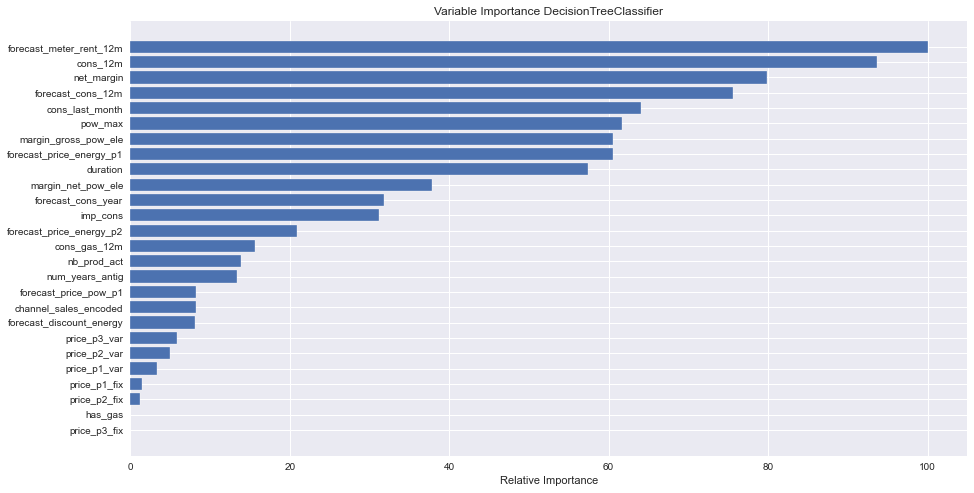

In [49]:
def plot_importance(model):
  
    feature_importance = model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(15,8))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title(f'Variable Importance {model.__class__.__name__}')
    plt.show()

plot_importance(clf)

We notice that the consumption of the clients are the features that influence more the model for the DecisionTreeClassifier, as for the kNN, we obtain a very high accuracy and F1 score.

## Naive Bayes model

In [53]:
# Test Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Print the confusion matrix
y_true = y_test
confusion_matrix(y_true, y_pred)

array([[ 7184, 44520],
       [  448,  5061]], dtype=int64)

In [54]:
# Metrics for the Naive Bayes
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('For Naive Bayes, we have the following results : \ntn:'+ str(tn) + '  ' + 'fp:'+ str(fp) + '  '+'fn:'+ str(fn) + ' tp:'+ str(tp) + ' , meanwhile the accuracy is ' + " " + str(accuracy_score(y_true, y_pred)))
print('The F1 score is ' + str(f1_score(y_true, y_pred, average='macro')))

For Naive Bayes, we have the following results : 
tn:7184  fp:44520  fn:448 tp:5061 , meanwhile the accuracy is  0.2140247845769318
The F1 score is 0.21294106279762876


## SVMs model

In [57]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_true = y_test
confusion_matrix(y_true, y_pred)

array([[51704,     0],
       [ 5509,     0]], dtype=int64)

In [58]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('For SVMs, we have the following results : \ntn:'+ str(tn) + '  ' + 'fp:'+ str(fp) + '  '+'fn:'+ str(fn) + ' tp:'+ str(tp) + ' , meanwhile the accuracy is ' + " " + str(accuracy_score(y_true, y_pred)))
print('The F1 score is ' + str(f1_score(y_true, y_pred, average='macro')))

For SVMs, we have the following results : 
tn:51704  fp:0  fn:5509 tp:0 , meanwhile the accuracy is  0.9037106951217381
The F1 score is 0.4747101003516439


# Now comparison between various ML models used

Indeed, the least performing : Naive Bayes displays an accurary score and F1 score of 21%, which is very low, then come the two algorithms SVMs and Logistic Regression which display the same performances: 90% accuracy and 47% for the F1-score, by examining them more closely, we notice that they just categorize everything as negative. This allows the algorithms to have a good accuracy as the data is unbalanced, but the presence of the F1-score metric allows us to see that the models are not efficient.

Finally, we find the Decision Trees with 99% of accuracy and F1 score as well as the kNN (k nearest neighbors) algorithm which displays a perfect score of 100% on the accuracy and F1 score! This can be explained by the kNN algorithm having a complex non-linear decision boundary curve (curve separating the positive classes from the negative classes) with regions clustered around certain points, thus allowing to isolate the areas where the positive classified points appear.